# DIABETES PREDICTION MODEL

# INTRODUCTION

# Diabetes mellitus is the most  common chronic disease worldwide and keeps increasing everyday due to changing lifestyles, unhealthy food habits and over weight problems that can be dangerous.


# Diabetes can be identified when blood glucose is higher than normal level, which iscaused by high secretion of insulin or biological effects.

# Diabetes can cause various damage to our body and can disfunction tissues, kidneys, eyes and blood vessels. 

# #Diabetes can be divided into two categories type 1 diabetes and type 2 diabetes.

# OBJECTIVES OF STUDY

# identify whether a patient has diabetes or not, based on the different characteristics in the dataset


# developing breakthroughs with the ability to detect and classify gaps in patient care.


# to contribute to improving the quality of patient care and reducing medical cost.


# this work is useful in determining the risk factors responsible for the development of diabetes from clinical data and predicting prediabetes. 

# to detect and classify diabetes in patients using MLmodels and to select the best classification model to predict the risk of diabetes.

THIS DATASET WAS GOTTTEN FROM THE NATIONAL INSTITUTE OF DIABETES AND DIGESTIVE AND KIDNEY DISEASES FROM KAGGLE.

# importing the required dependencies

In [63]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.preprocessing import StandardScaler

what the folloiwng dependencies are used for in this project 

pandas: data manipulations 

nuumpy: python library for carrying out Algebraic/statistical expressions.

seaborn and matplotlib : python library for data visualization.

train_test_split: this is used when splitting data set into train and test data.

accuracy score : metrics used in carrying out model performance evaluation by checking model accuracy.

svm : support vector machine is a machine learning algorithm that is used for solving classification and regression task. however in this project we will employ support vector classifier in making the prediction since target variable binary classification problems.

In [2]:
# loading the diabetes dataset
df = pd.read_csv('/Users/macbook/Downloads/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# checking for the numbers of rows in the dataset
len(df)

100000

In [4]:
# checking for the numbers of rows and columns in the dataset
df.shape


(100000, 9)

# Exploratory Data Analysis
this is process of exploring the entire dataset to uncover hidden information

The entirety of the dataset which is 100,000 rows and 9 columns were explored in a bid to uncover any hidden information amongst the dataset.
Some pandas function was used to check how many diabetes patients is in the dataset and no of patients who doesn’t have diabetes.

In exploring the dataset , the independent variables were; 
Gender, age , previous case of hypertension, smoking history, heart disease, bmi, blood glucose level, diabetes.
Which was use to determine the dependent variable.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


explaining the result from info function
after using the info function on the data frame we can clearly see that a complete summary of the no of series are presented ranging from 0-8, the info function also shows us the data type of each series within the data set. the total memory that the dataset is occupying is 6.9+ MB.

In [6]:
# checking for statistical information about numerical series
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


# data preprocessing

In [8]:
#dealing with missing values in the dataset
df.isnull().sum().sum()

0

In [9]:
#to check if there is a missing value in each columns
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [11]:
#exploring the diabetes column
df.groupby('diabetes')['diabetes'].count()

diabetes
0    91500
1     8500
Name: diabetes, dtype: int64

In [12]:
# checking how many people who have diabetes in the dataset from those that do not have diabetes using groupby function
df.groupby(['diabetes','gender'])['diabetes'].count()

diabetes  gender
0         Female    54091
          Male      37391
          Other        18
1         Female     4461
          Male       4039
Name: diabetes, dtype: int64

# carrying out data visualization

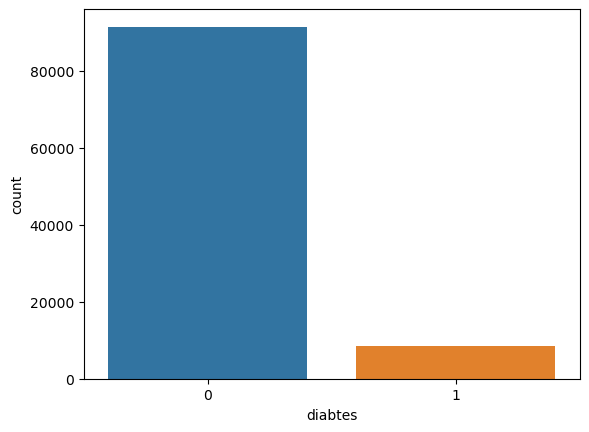

In [13]:
sns.countplot(x =df['diabetes'])      #counts the number of values in a series and visualizes it
plt.xlabel('diabtes')
plt.ylabel('count')
plt.show()

The chart above displays the total number of people who have diabetes  vs people who do not have diabetes. 

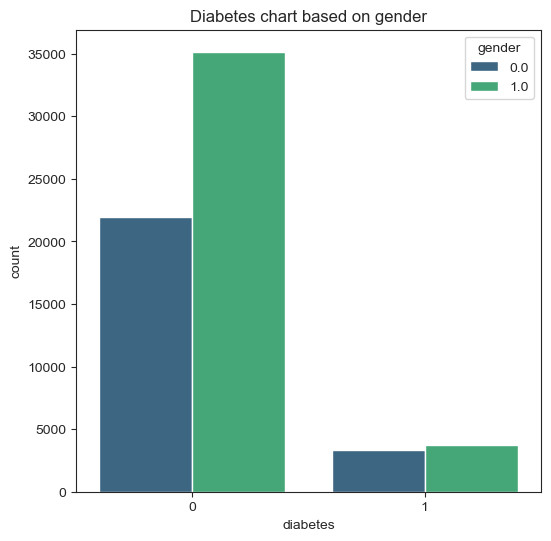

In [85]:
fig_1 = plt.figure(figsize=(6,6), dpi=100)
sns.set_style('ticks')
sns.countplot(x='diabetes', data=df, width=0.8, palette='viridis', hue='gender')
plt.title('Diabetes chart based on gender')
plt.show()

The chart above displays the total number of females and males who have diabetes and who do not have diabetes. 

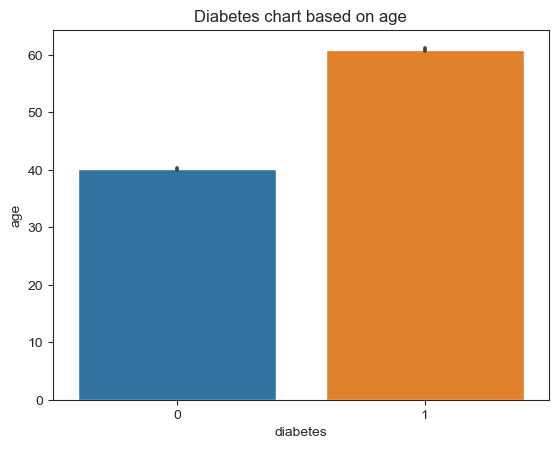

In [15]:
sns.barplot(x='diabetes', y='age', data = df)
plt.title('Diabetes chart based on age')
plt.show()

The chart above displays the total number of people who have diabetes and people who do not have diabetes, based on their different ages. 

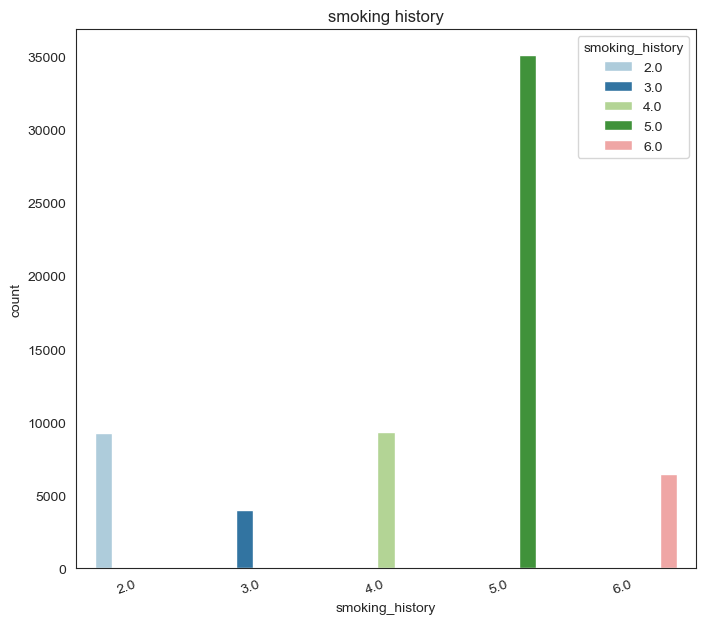

In [86]:
plt.figure(figsize=(8,7), dpi=100)
sns.set_style('white')
sns.countplot(x='smoking_history', data=df, width=0.7, palette='Paired', hue='smoking_history')
plt.title('smoking history')
plt.xticks(rotation=20, ha='right')
plt.show()

In [17]:
#exploring the diabetes column
df.groupby('diabetes')['diabetes'].count()   

diabetes
0    91500
1     8500
Name: diabetes, dtype: int64

In [18]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [19]:
#exploring the gender column
df.groupby('gender')['gender'].count() 

gender
Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

Data Preprocessing


Since machine learning algorithm do not accept string data, we will convert the gender column into numerical values using lmapping technique.

In [20]:
# Converting the gender column to numerical values using lmapping technique: female==>>1 and male==>0
mapping = {"Female": 1, "Male": 0}
# Convert categorical string values to numeric values using map() function
df["gender"] = df["gender"].map(mapping)

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,No Info,27.32,6.2,90,0
99996,1.0,2.0,0,0,No Info,17.37,6.5,100,0
99997,0.0,66.0,0,0,former,27.83,5.7,155,0
99998,1.0,24.0,0,0,never,35.42,4.0,100,0


In [21]:
#exploring the smoking_history column
df.groupby('smoking_history')['smoking_history'].count() 

smoking_history
No Info        35816
current         9286
ever            4004
former          9352
never          35095
not current     6447
Name: smoking_history, dtype: int64


Since machine learning algorithm do not accept string data, we will convert the smoking history column into numerical values using lmapping technique.

In [22]:
# Converting the smoking history column to numerical values using lmapping technique: female==>>1 and male==>0
mapping = {"No info": 1, "current": 2, "ever": 3, "former": 4, "never": 5, "not current": 6}
# Convert categorical string values to numeric values using map() function
df["smoking_history"] = df["smoking_history"].map(mapping)

df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,5.0,25.19,6.6,140,0
1,1.0,54.0,0,0,NaN,27.32,6.6,80,0
2,0.0,28.0,0,0,5.0,27.32,5.7,158,0
3,1.0,36.0,0,0,2.0,23.45,5.0,155,0
4,0.0,76.0,1,1,2.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,NaN,27.32,6.2,90,0
99996,1.0,2.0,0,0,NaN,17.37,6.5,100,0
99997,0.0,66.0,0,0,4.0,27.83,5.7,155,0
99998,1.0,24.0,0,0,5.0,35.42,4.0,100,0


In [23]:
df.isnull().sum()

gender                    18
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

after converting to numerical data , there were missing values, which we have to fill or drop them

In [24]:
df['gender'].fillna(method='ffill',inplace=True)

In [25]:
df.dropna(subset=['smoking_history'], inplace=True)

In [26]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [27]:
df.shape

(64184, 9)

In [29]:
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,5.0,25.19,6.6,140,0
2,0.0,28.0,0,0,5.0,27.32,5.7,158,0
3,1.0,36.0,0,0,2.0,23.45,5.0,155,0
4,0.0,76.0,1,1,2.0,20.14,4.8,155,0
5,1.0,20.0,0,0,5.0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,1.0,26.0,0,0,5.0,34.34,6.5,160,0
99993,1.0,40.0,0,0,5.0,40.69,3.5,155,0
99997,0.0,66.0,0,0,4.0,27.83,5.7,155,0
99998,1.0,24.0,0,0,5.0,35.42,4.0,100,0


In [30]:
#splitting the data set into two, into dependent variable(Y) and the independent variable(X)
x=df.drop('diabetes', axis=1)
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1.0,80.0,0,1,5.0,25.19,6.6,140
2,0.0,28.0,0,0,5.0,27.32,5.7,158
3,1.0,36.0,0,0,2.0,23.45,5.0,155
4,0.0,76.0,1,1,2.0,20.14,4.8,155
5,1.0,20.0,0,0,5.0,27.32,6.6,85
...,...,...,...,...,...,...,...,...
99992,1.0,26.0,0,0,5.0,34.34,6.5,160
99993,1.0,40.0,0,0,5.0,40.69,3.5,155
99997,0.0,66.0,0,0,4.0,27.83,5.7,155
99998,1.0,24.0,0,0,5.0,35.42,4.0,100


In [31]:
y=df['diabetes']
y

0        0
2        0
3        0
4        0
5        0
        ..
99992    0
99993    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 64184, dtype: int64

In [32]:
# DATA standardization scaling the process of transforrming data points so that the system will see those data point
#to be on the same range. this is to prevent the model from giving prefrences to data point with higher values, than
#data point with smaller vaules

scaler = StandardScaler()   #the function that scales 
scaler.fit(x)  #to fit the dataset 

StandardScaler()

In [34]:
#transforming data
transformed_data = scaler.transform(x)
transformed_data

array([[ 0.80728878,  1.71215847, -0.32941282, ..., -0.49632387,
         0.94542128,  0.00881702],
       [-1.23871411, -0.94902453, -0.32941282, ..., -0.16944366,
         0.12388667,  0.43570554],
       [ 0.80728878, -0.53961176, -0.32941282, ..., -0.76335278,
        -0.51508469,  0.36455746],
       ...,
       [-1.23871411,  0.99568612, -0.32941282, ..., -0.09117656,
         0.12388667,  0.36455746],
       [ 0.80728878, -1.15373091, -0.32941282, ...,  1.07362194,
        -1.42790093, -0.93982413],
       [ 0.80728878,  0.53509676, -0.32941282, ..., -0.91988696,
         0.94542128, -1.17698442]])

In [35]:
#splitting our dataset into training and testing data
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [36]:
#checking the given values of each splitted data
x_train.shape

(51347, 8)

In [37]:
x_test.shape

(12837, 8)

In [38]:
y_test.shape

(12837,)

In [39]:
y_train.shape

(51347,)

In [40]:
# lets' convert the values in our y variable into integer. Although it's already in form of 0's and 1's but
# the system still reads it as string not integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# model buildng phase. # 3 algorithms were used to evaluate and build this model which were 


# Support vector machine 


# Decision tree classifier 

# Random forest classifier

In [41]:
#using support vector machhine
model = svm.SVC(kernel='poly')   #kernel is a method that is used for the algorithm

In [42]:
#training the support vector classifier
model.fit(x_train, y_train)

SVC(kernel='poly')

In [43]:
# pridicting the trained data 
x_train_prediction = model.predict(x_train)


x_train_prediction

array([0, 0, 0, ..., 0, 0, 0])

Carrying Out Model's Performance Evaluation
since this is a binary classification problem, we will use the accuracy score metrics to evaluate the accuaracy level of our machine learning model using the accuracy_score function that we imported in line 7 of this project.

In [71]:
#checking the accuracy score of the trained data
training_Data_Accuracy = accuracy_score(x_train_prediction, y_train).round(2)


print('The accuracy for the training data using Support vector machine is: ',training_Data_Accuracy)

The accuracy for the training data using Support vector machine is:  1.0


As we can see using the accuracy score to evaluate our model, it gives 1.0 as the percentage which means 100%. This is a very good model since its having 100% accuracy.Note: this is the accuracy result for the training data using the Support vector machine.

In [45]:
# pridicting the test data 

x_test_prediction = model.predict(x_test)


x_test_prediction

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
#checking the accuracy score of the test data

test_data_acurracy = accuracy_score(x_test_prediction, y_test).round(2)


print('The accuracy for the test data using Support vector machine  is: ', test_data_acurracy)

The accuracy for the test data using Support vector machine  is:  0.96


In [ ]:
# now let's run cross validation on the model
# to ascertain if we will still obtain 100% accuracy

In [47]:
#cross validation is a technique used to evaluate and validate if the model is working okay

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [73]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 5
scores = cross_val_score(model, x_train, y_train, cv=k)

print("The cross validation score for each fold is:", scores)

The cross validation score for each fold is: [0.93739046 0.94148004 0.9376765  0.94205862 0.93981887]


We can see that the cross validation score on the training data using the Support vector machine. for 5 Folds are: 93%, 94%, 93%, 94% and 93%. The result of the validation test although it's not 100% as the accuracy score metrics, still shows that the model is perfect for making good predictions , The goal of cross validation is to test the model’s ability to predict new data that was not used in estimating it. 

# USING RANDOM FOREST CLASSIFIER

In [64]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [65]:
# Initialize the Random Forest Classifier
randfor_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

randfor_classifier


RandomForestClassifier(random_state=42)

In [66]:
# Train the model on the training data

randfor_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# predicting the trained data 
x_train_prediction = randfor_classifier.predict(x_train)


x_train_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
#checking the accuracy score of the trained data
trained_Data_Accuracy = accuracy_score(x_train_prediction, y_train)

trained_Data_Accuracy

0.9994546906343117

In [69]:
# predicting the test data 

x_test_prediction = randfor_classifier.predict(x_test)


x_test_prediction

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
#checking the accuracy score of the test data

test_data_acurracy = accuracy_score(x_test_prediction, y_test)


test_data_acurracy.round(2)

0.96

USING DECISISON TREE CLASSIFIER

In [75]:

from sklearn.tree import DecisionTreeClassifier # algorithm for solving binary classification problem in data science
from sklearn.metrics import precision_score  # for model's performance evaluation
from sklearn.metrics import recall_score # for model's performance evaluation

In [76]:
model =DecisionTreeClassifier()
model.fit(x_train,y_train )

DecisionTreeClassifier()

In [78]:
# Carrying out prediction on the train data using the decision tree classifier
train_data_prediction = model.predict(x_train)


print('The pridiction for the training data using decision tree classifier is: ',train_data_prediction)

The pridiction for the training data using decision tree classifier is:  [0 0 0 ... 0 0 0]


In [79]:
accuracy_score_train = accuracy_score(y_train, train_data_prediction)

print('The accuracy for the training data using decision tress classifier is: ', accuracy_score_train)

The accuracy for the training data using decision tress classifier is:  0.9995325919722671


As we can see using the accuracy score to evaluate our model, it gives 0.99 as the percentage which means 100%. This is a very good model since its having 100% accuracy.Note: this is the accuracy result for the training data using the Descision Tree Classifier algorithm

In [80]:
# Carrying out prediction on the test data using the decision tree classifier
test_data_prediction = model.predict(x_test)

accuracy_score_test = accuracy_score(y_test, test_data_prediction)

print('The accuracy for the test data using decision tress classifier is: ', accuracy_score_test)

The accuracy for the test data using decision tress classifier is:  0.942354132585495


EVALUATING THE DECISION TREE MODEL USING PRECISION SCORE METRICS

In [81]:
precision=precision_score(y_test, test_data_prediction)

print('The precision score for Decision Tree test dataset is', precision.round(2))

The precision score for Decision Tree test dataset is 0.73


EVALUATING THE DECISION TREE MODEL USING RECALL METRICS

In [82]:
re_score=recall_score(y_test, test_data_prediction)

print('The recall score for Decision Tree test dataset is', precision.round(2))

The recall score for Decision Tree test dataset is 0.73


Now let's compare the results of the three models. From our analysis, all the three Machine learning Algorithm used in training the dataset in this project (which are: SVC,Random Forest Classifier and  Decision Tree Classifier)gives 100% accuracy on training data. While on test data,SVC gives 96% accuracy,  Decision tree classifier gives 94% accuracy, and logistic Regression gives 96% accuracy. Since Decision tree classifier and Logistic Regression are producing the best inaccuracies, we will employ one of these model in building a Predictive System

In [ ]:
bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb

Data Preprocessing
Since machine learning algorithm do not accept string data, we will convert the Category column into numerical values using lmapping technique.